In [66]:
import pandas as pd

# 데이터 경로

data_path = './porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col ='id')


In [67]:
train.shape,  test.shape

((595212, 58), (892816, 57))

In [68]:
train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [69]:
test.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [70]:
submission.head() # 타깃값이 1일 확률, 타깃값 0은 운전자가 보험금을 청구하지 않는 경우, 타깃값 1은 청구하는 경우

,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [71]:
train.info()

#ps

#ind,reg , car ,calc ==> 분류

#01, 02 ,03 ==> 분류별 일련번호

# _bin , _cat ==> 이진피처 , 명목형 피처 , 생략시 순서형 피처 또는 연속형 피처

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [72]:
#!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org missingno

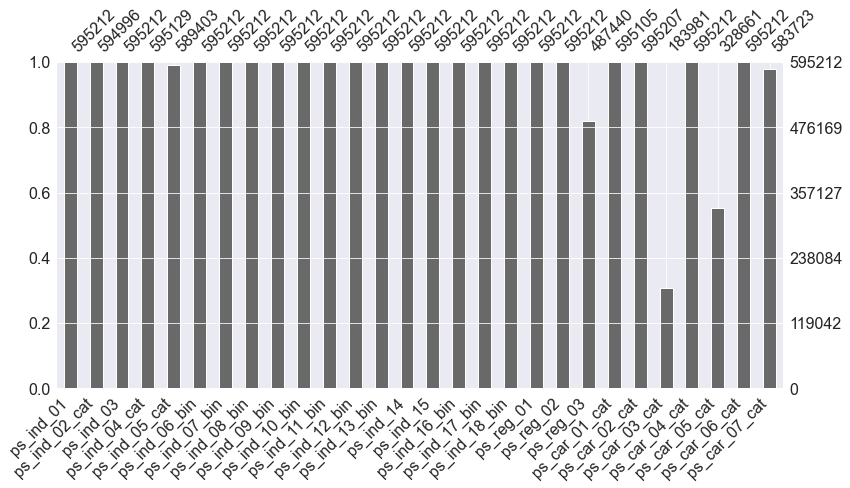

In [73]:
import numpy as np
import missingno as msno

# 훈련데이터 복사본에서 -1을 np.NaN으로 변환
train_copy = train.copy().replace(-1 , np.NaN)

# 결측값 시각화(처음 28개만)
msno.bar(df=train_copy.iloc[: , 1:29] , figsize=(13,6))

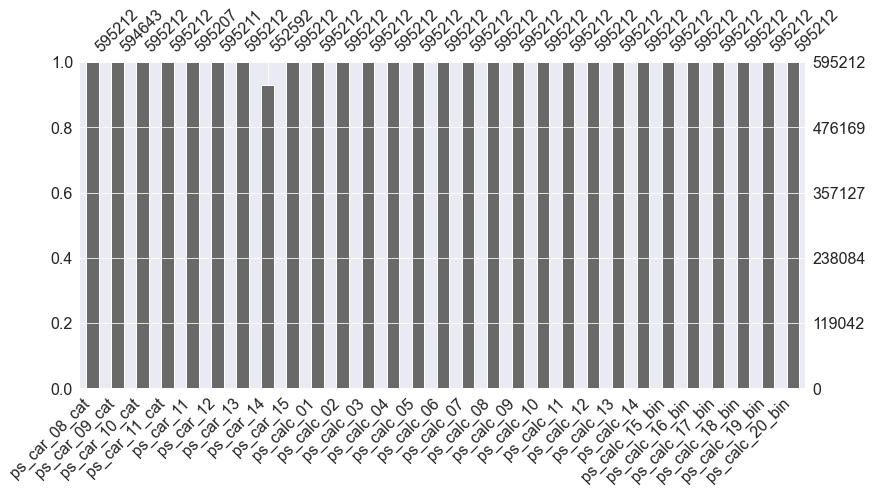

In [74]:
msno.bar(df=train_copy.iloc[:,29:] , figsize=(13,6))

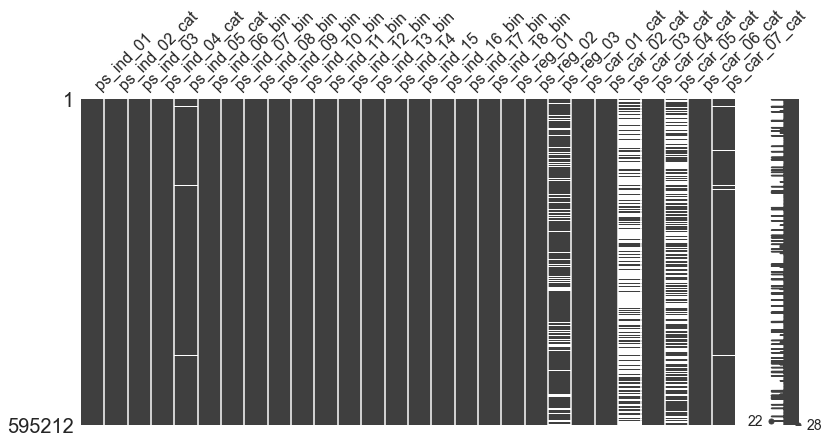

In [75]:
msno.matrix(df=train_copy.iloc[:, 1:29] , figsize=(13,6))

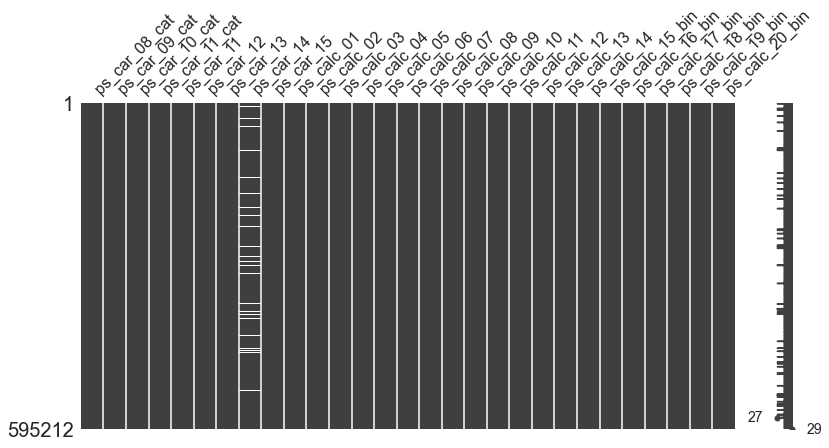

In [76]:
msno.matrix(df=train_copy.iloc[:, 29:] , figsize=(13,6))

In [77]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes , columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values # 피처별 -1 개수
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col , '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col , '데이터 종류'] = '명목형'
        elif df[col].dtype == 'float64':
            summary.loc[col , '데이터 종류'] = '연속형'
        elif df[col].dtype == 'int64':
            summary.loc[col, '데이터 종류'] = '순서형'
    return summary

In [78]:
summary = resumetable(train)
summary

데이터셋 형상 : (595212, 58)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,순서형
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,순서형
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [79]:
# summary = pd.DataFrame(train.dtypes , columns = ['데이터 타입'])
# summary['데이터 종류'] = None
# for col in train.columns:
#     print(col)
#     print(train[col].dtype)
# if train[col].dtype == 'float':
#         print(col)
#         summary.loc[col, '데이터 종류'] = '연속형'
#
# summary

In [80]:
summary[summary['데이터 종류'] == '명목형'].index

# 명목형 피처만 추출

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [81]:
summary[summary['데이터 타입'] == 'float64'].index # 데이터 타입이 실수형인 피처

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

## 데이터 시각화

In [82]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

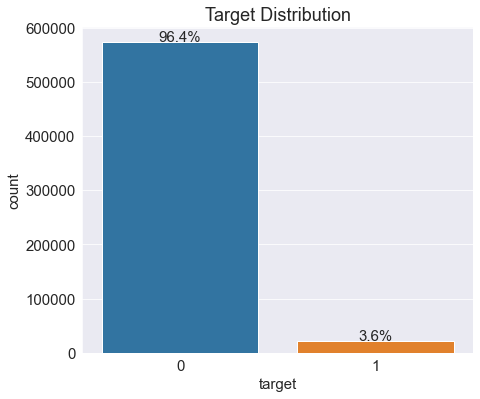

In [83]:
def write_percent(ax , total_size):
    # 도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(left_coord + width/2.0, # x축 위치
                height + total_size*0.001, # y축 위치
                '{:1.1f}%'.format(percent), # 입력 텍스트
                ha = 'center' ) # 가운데 정렬

mpl.rc('font' , size = 15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data = train)
write_percent(ax , len(train)) # 비율 표시
ax.set_title('Target Distribution')

# 전체 운전자 중 3.6%먼 보험금을 청구했다는 뜻이다. ==> 타깃값이 불균형하다.

## 이진 피처

In [84]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features , num_rows , num_cols , size=(12,18)):
# features 는 데이터 종류
    mpl.rc('font' , size= 9)
    plt.figure(figsize = size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows , num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3 , hspace=0.3) # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax 축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature , y='target' , data = df , palette='Set2' , ax =ax)

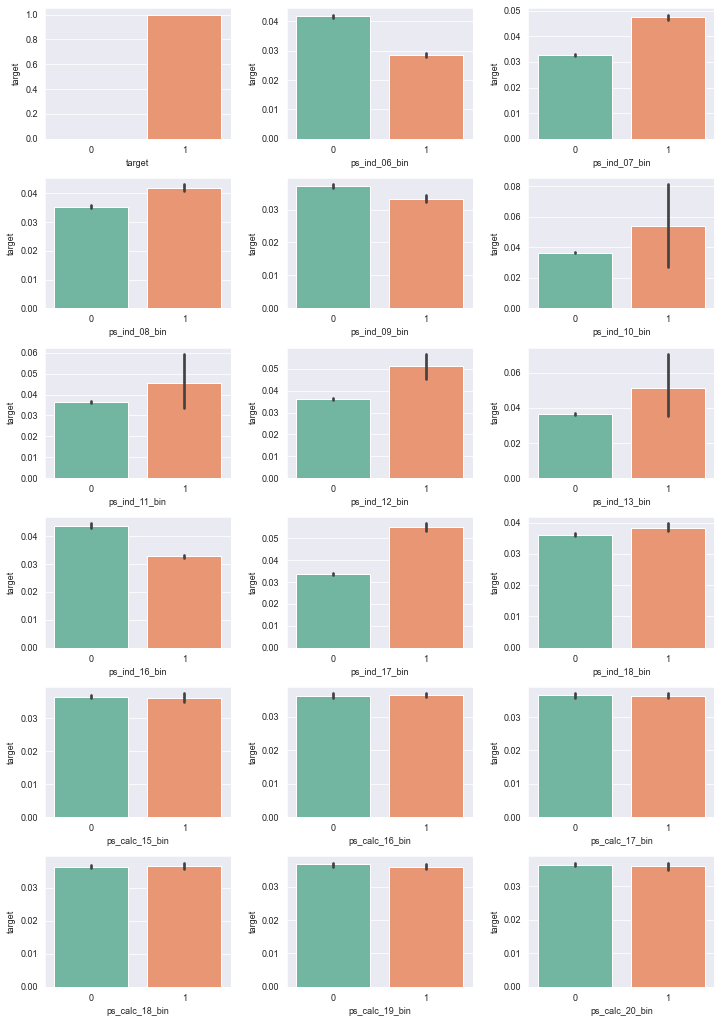

In [85]:
bin_features = summary[summary['데이터 종류'] == '이진형'].index # 이진 피처

# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(train , bin_features , 6 , 3) # 6행 3열로 배치

## 명목형 피처

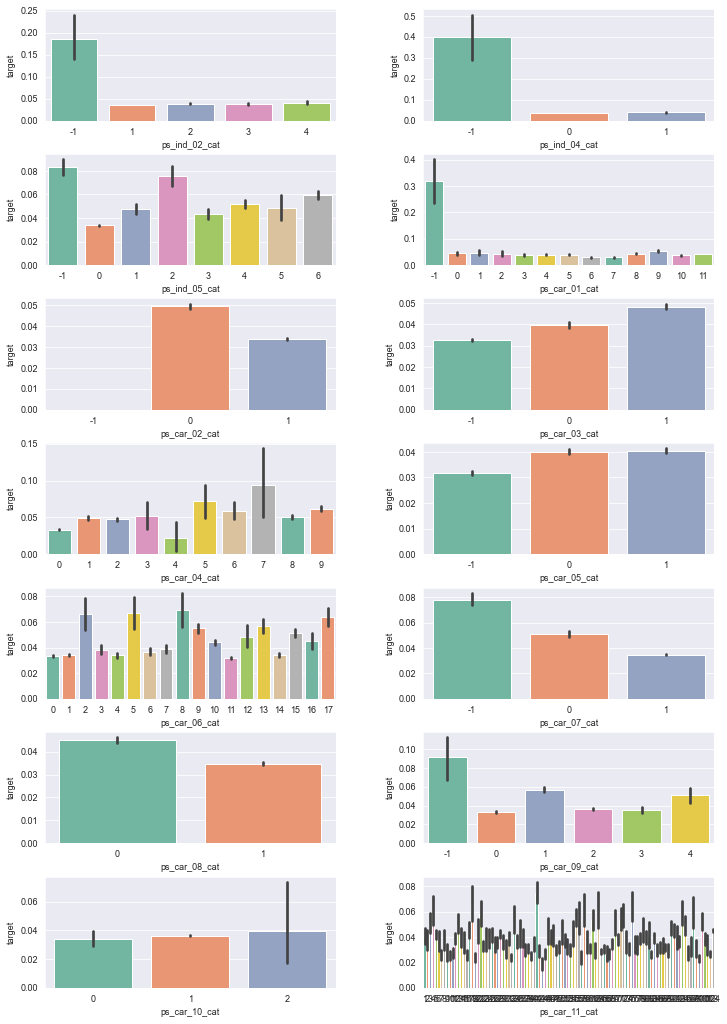

In [86]:
nom_features = summary[summary['데이터 종류'] == '명목형'].index # 명목형 피처

plot_target_ratio_by_features(train , nom_features , 7 , 2) # 7행 2열

## 순성형 피처

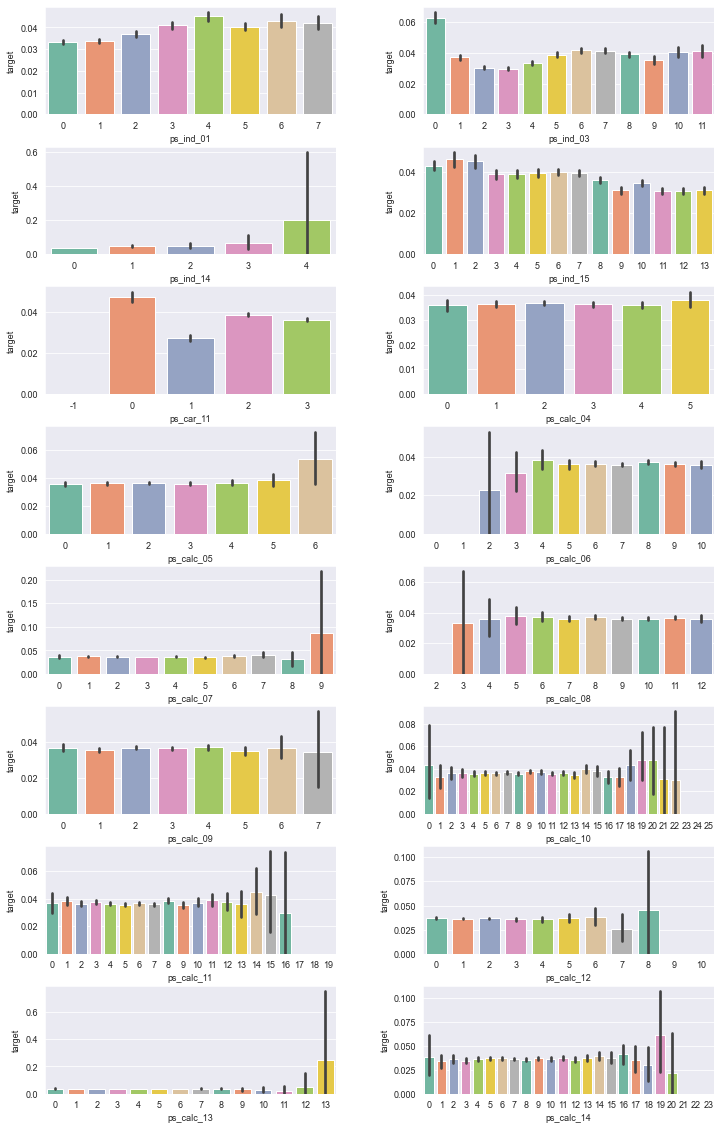

In [87]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 순서형 피처

plot_target_ratio_by_features(train , ord_features , 8,2 ,(12,20)) # 8행 2열

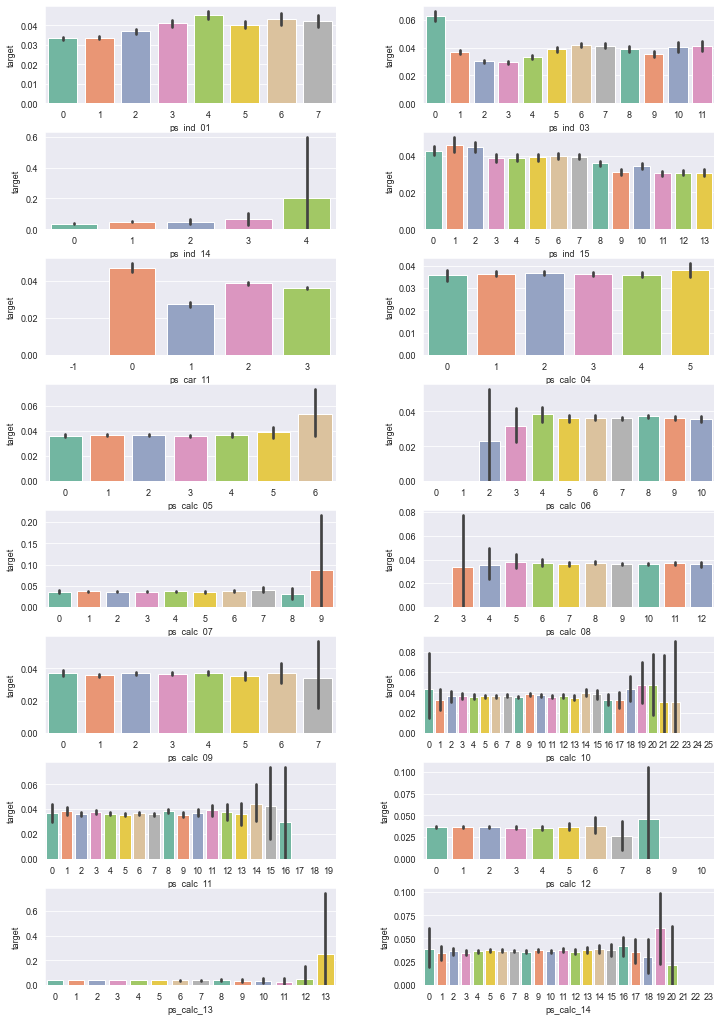

In [88]:
ord_features = summary[summary['데이터 종류'] == '순서형'].index # 명목형 피처

plot_target_ratio_by_features(train , ord_features , 8 , 2) # 7행 2열

In [89]:
summary[summary['데이터 종류'] == '순서형']

,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
ps_ind_01,int64,0,8,순서형
ps_ind_03,int64,0,12,순서형
ps_ind_14,int64,0,5,순서형
ps_ind_15,int64,0,14,순서형
ps_car_11,int64,5,5,순서형
ps_calc_04,int64,0,6,순서형
ps_calc_05,int64,0,7,순서형
ps_calc_06,int64,0,11,순서형
ps_calc_07,int64,0,10,순서형
ps_calc_08,int64,0,11,순서형


## 연속형 피처

In [90]:
# 연속형 데이터를 구간으로 나누려면 판다스의 cut()함수를 활용하면 된다.

pd.cut([1.0 , 1.5 , 2.1 , 2.7 , 3.5 , 4.0], 3) # cut()함수를 활용해 여러 개의 값을 3개 구간으로 나누었다.

# ==> 연속형 데이터를 범주형 데이터로 바꾸는 효과가 있다.

[(0.997, 2.0], (0.997, 2.0], (2.0, 3.0], (2.0, 3.0], (3.0, 4.0], (3.0, 4.0]]
Categories (3, interval[float64]): [(0.997, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

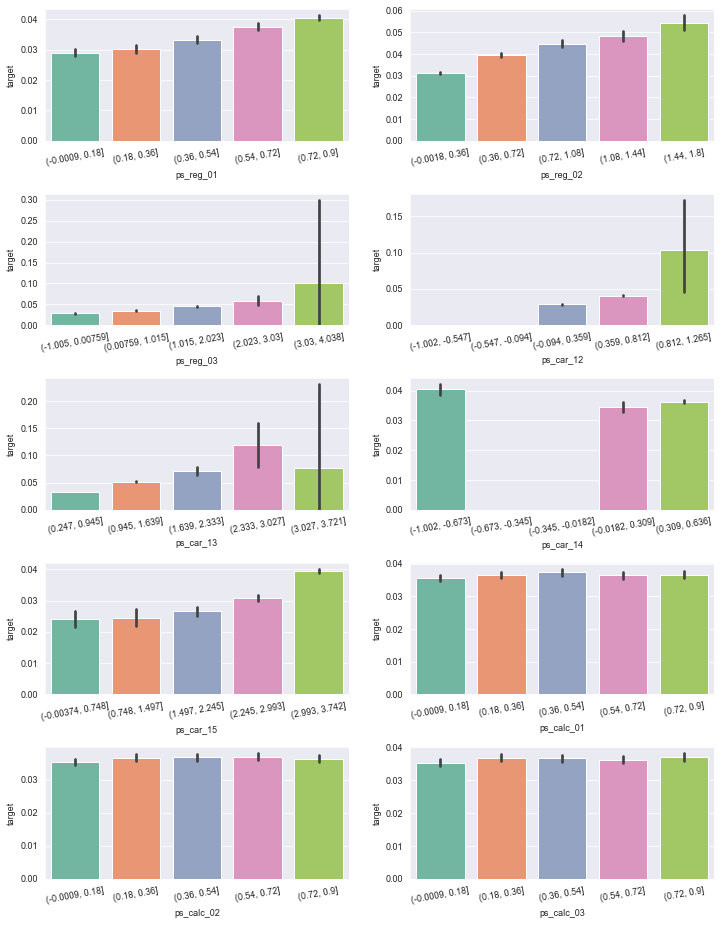

In [91]:
cont_features = summary[summary['데이터 종류'] == '연속형'].index # 연속형 피처

plt.figure(figsize= (12,16))
grid = gridspec.GridSpec(5,2)
plt.subplots_adjust(wspace= 0.2 , hspace = 0.4) # 서브플롯 간 여백 설정

for idx , cont_feature in enumerate(cont_features):
    #값을 5개 구간으로 나누기
    train[cont_feature] = pd.cut(train[cont_feature] , 5)

    ax = plt.subplot(grid[idx]) # 분포도를 그릴 서브플롯 설정
    sns.barplot(x = cont_feature , y= 'target' , data = train , palette= 'Set2' , ax = ax)
    ax.tick_params(axis ='x' , labelrotation =10 ) # x축 라벨 회전

In [92]:
train_copy = train_copy.dropna() # np.NaN 값 삭제

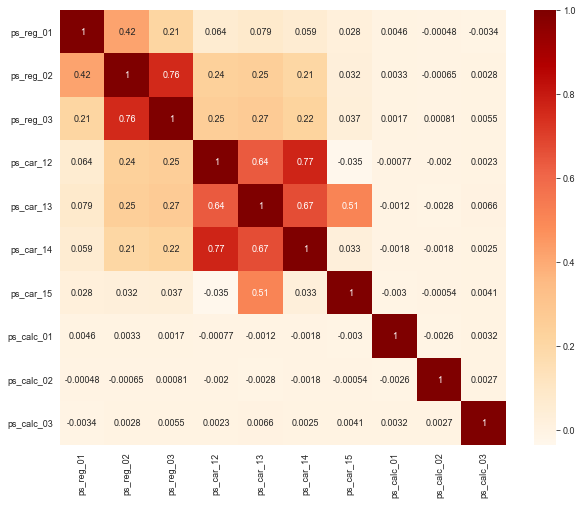

In [93]:
plt.figure(figsize =(10 , 8))
cont_corr = train_copy[cont_features].corr() # 연속형 피처 간 상관관계
sns.heatmap(cont_corr, annot = True , cmap = 'OrRd')  # 히트맵 그리기